# 1日目の復習＋α

## 0. TKET環境のインストール

環境にTKET (pytket)と拡張機能(pytket-extension)をインストール。  
以下のセルを実行し、インストールしてください。

In [ ]:
!pip install -U pytket
!pip install -U pytket-quantinuum
!pip install -U pytket-quantinuum[pecos]
!pip install -U pytket-qiskit
!pip install -U pytket-qulacs
##!pip install -U pytket-braket #こちらのパッケージは同一の環境でpytket-quantinuumと共に利用することができません。
##!pip install -U pytket-qsharp #こちらのパッケージは.net等のインストールが必要です。
!pip install -U matplotlib #可視化のためのパッケージ
!pip install -U pylatexenc #可視化のためのパッケージ

pytket がインストールされたか確認

In [2]:
!pip freeze |grep pytket

pytket==1.25.0
pytket-phir==0.4.3
pytket-qiskit==0.48.0
pytket-qsharp==0.39.0
pytket-quantinuum==0.29.0
pytket-qulacs==0.34.0
pytket_pecos==0.1.16


In [3]:
# If you use windows os, you can check that below.
#!pip show pytket pytket-quantinuum pytket_pecos pytket-qiskit pytket-qulacs

## 1. 今日の量子コンピュータの問題

- Noisy Intermediate-Scale Quantum (NISQ) デバイス
    - 量子回路が深くなる（ゲート数が多くなる）ほど、誤差が大きくなる
    - 十分な量子ビット数ではない
- 量子デバイスは特別なゲート演算のみが用意されている
- 特定のqubits間の量子ビット演算(multi qubit operation)しか用意されていない
- それぞれの量子デバイスに対して、量子ソフトウェアツールキットが用意されてる


### 1-1. TKETとは
- Quantum Software Development Kit
- TKETに実装されている回路最適化はC++で実装
- pythonモジュール　`pytket`で利用可能
- 最適化コンパイラ：　ユーザーフレンドリーな回路→量子デバイスで実行可能な回路に変換可能
    - Language-agnostic (多くの量子プログラミングフレームワーク(qiskit, Cirq, etc)をサポート)
    - Retagetable (多くの量子デバイス(IBM, Quantinuum, Amazon Braket(IonQ, Rigetti, OQC), Microsoft Azure Quantum(Quantinuu,IonQ, Rigetti) etc)をサポート)
    - Circuit Optimisation (量子計算時に生じるデバイスエラーの影響を最小化。デバイス依存＆デバイス非依存のものが実装)
    
<img src="./fig/tket1.png" width="750">



#### 参照
- [pytket ドキュメント](https://cqcl.github.io/tket/pytket/api/index.html)
- [pytket ユーザーマニュアル](https://cqcl.github.io/pytket/manual/index.html)
- [t|ket⟩ : A Retargetable Compiler for NISQ Devices](https://arxiv.org/abs/2003.10611)
- [TKET slack channel](https://join.slack.com/t/tketusers/shared_invite/zt-22295t975-eAsoPg0i4ANHajPAe61VzQ)

<img src="./fig/slack-qr.png" width="250">


### 1-2. pytketと拡張pytket (python パッケージ)
Python 3.11.6で動作確認をしています。

|  パッケージ （version） |  概要  |
| :---- | :---- |
|  pytket  |  TKETを利用するためのpython モジュール  ( available for python3.10 or higher )|
|  pytket-quantinuum  |  Quantinuumデバイス、エミュレータを利用するためのpytket-extension  |
|  pytket-qiskit  |  qiskit、IMBQデバイスを利用するためのpytket-extension  |
|  pytket-circ    |  Google circを利用するためのpytket-extension  |
|  pytket-qsharp  |  Azure Quantumを利用するためのpytket-extension  |
|  pytket-braket  |  Amazon Braketを利用するためのpytket-extension  |
|  pytket-qulacs  |  Qulacsシミュレータを利用するためのpytket-extension  |

<img src="./fig/tket2.png" width="850">

## 2. 量子回路を作成する[復習]
ここでは `qiskit`や`TKET`でGreenberger–Horne–Zeilinger状態を作成する。

### 2-1. `TKET`で4 qubitsのGreenberger–Horne–Zeilinger状態(GHZ状態)を作成
$$ |\Psi\rangle = \frac{1}{\sqrt{2}}(|0000\rangle+|1111\rangle)$$

In [35]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

ghz4 = Circuit(4)
ghz4.H(0).CX(0,1).CX(0,2).CX(0,3)
ghz4.measure_all()
render_circuit_jupyter(ghz4)

#### 研究者向け：量子回路のLatexソースを生成することが可能

In [6]:
ghz4.to_latex_file("bell.tex")

### 2-2. `pytket-qiskit`でTKET 量子回路をIBMのローカルシミュレータで計算[復習]

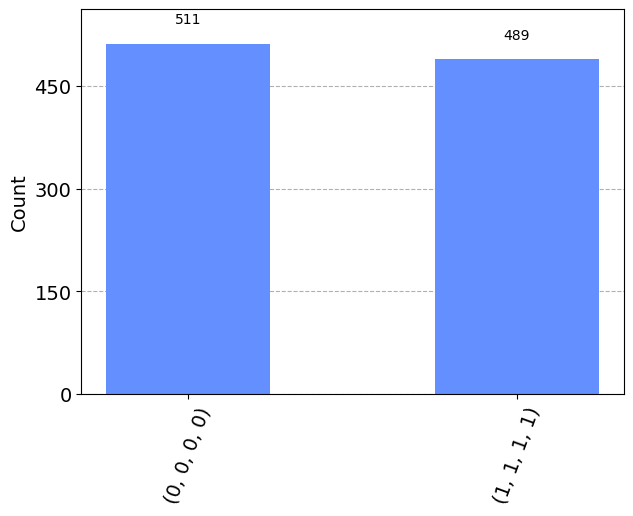

In [4]:
from qiskit.visualization import plot_histogram
from pytket.extensions.qiskit import AerBackend
aer_backend = AerBackend()

handle = aer_backend.process_circuit(ghz4, n_shots =1000)
result_counts = aer_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

### 2-3. `pytket-qiskit`でTKET 量子回路をIBMの量子デバイスで計算[復習]

In [7]:
path = 'key/ibm-token'
f = open(path)
ibm_token = f.read()
f.close()
#from pytket.extensions.qiskit.backends.config import set_ibmq_config
#set_ibmq_config(ibmq_api_token=ibm_token, instance=f"ibm-q/open/main")

In [8]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token=ibm_token, overwrite=True)

In [9]:
from pytket.extensions.qiskit import IBMQBackend

In [10]:
# ibm_backend = AerBackend()
# ibm_backend = IBMQBackend("ibm_osaka")
# ibm_backend = IBMQBackend("ibm_tokyo")
# ibm_backend = IBMQBackend("ibm_brisbane")
ibm_backend = IBMQBackend("ibmq_qasm_simulator")

In [ ]:
# aer_backend を ibm_backendに変更
ibm_ghz4 = ibm_backend.get_compiled_circuit(ghz4)
handle = ibm_backend.process_circuit(ibm_ghz4, n_shots =1000)
result_counts = ibm_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

In [ ]:
# get handle_id
#print(handle)

In [11]:
#from pytket.backends import ResultHandle
#from pytket.extensions.qiskit import IBMQBackend
#ibm_backend = IBMQBackend("ibmq_qasm_simulator")

In [12]:
#handle = "handle_id"
#result = ibm_backend.get_result(handle)
#counts = result.get_counts()
#print(counts)
#from qiskit.visualization import plot_histogram
#plot_histogram(counts)

### 2-4. `pytket-quantinuum`でTKET 量子回路をQuantinuum エミュレータで計算[復習]

In [13]:
from pytket.extensions.quantinuum import QuantinuumAPIOffline
api = QuantinuumAPIOffline()

In [15]:
from pytket.extensions.quantinuum import QuantinuumBackend
quantinuum_backend = QuantinuumBackend(device_name ='H1-1LE',api_handler = api)
#quantinuum_backend = QuantinuumBackend(device_name ='H2-1LE',api_handler = api)
quantinuum_ghz4 = quantinuum_backend.get_compiled_circuit(ghz4)
render_circuit_jupyter(quantinuum_ghz4)
render_circuit_jupyter(ghz4)

(Note: This is the (slow) Python simulator.)


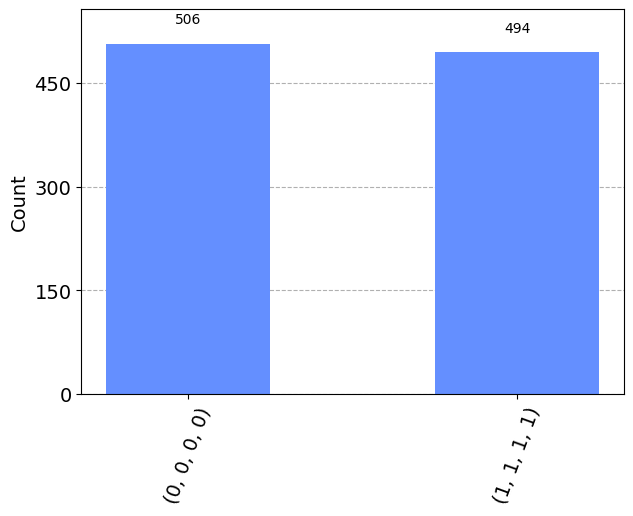

In [16]:
handle = quantinuum_backend.process_circuit(quantinuum_ghz4, n_shots=1000)
result = quantinuum_backend.get_result(handle)
counts = result.get_counts()
plot_histogram(counts)

### 2-6. `pytket-qulacs`でTKET 量子回路をQulacsシミュレータで計算[復習]

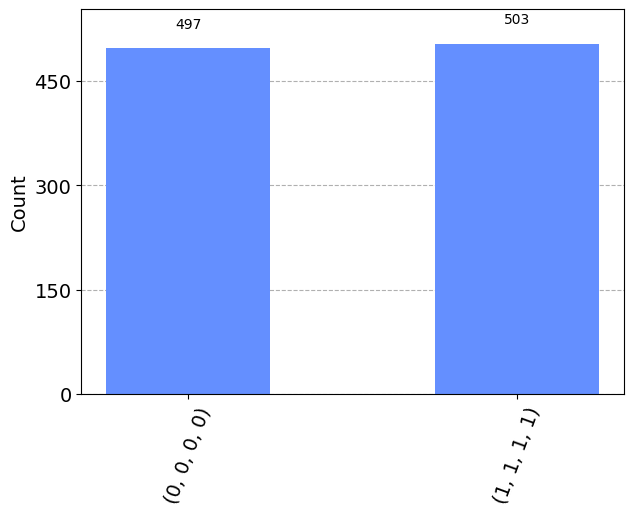

In [17]:
from pytket.extensions.qulacs import QulacsBackend
qulacs_backend = QulacsBackend()
handle = qulacs_backend.process_circuit(ghz4, n_shots =1000)
result_counts = qulacs_backend.get_result(handle).get_counts()
plot_histogram(result_counts)

## 3. 量子回路の最適化[復習]
例えば、Hゲートを同じビットに連続して作用させるとゲート操作をしていないのと恒等な量子状態が得られます。

量子回路が深くなる（ゲート数が多くなる）ほど、誤差が大きくなるNISQ デバイスでは左辺のような状況は除去したい。

その他にも様々な恒等な関係があります。

In [36]:
from pytket.pauli import Pauli
from pytket.circuit import PauliExpBox, fresh_symbol, OpType
from pytket.passes import DecomposeBoxes
box = PauliExpBox([Pauli.I, Pauli.Z, Pauli.X, Pauli.Y], fresh_symbol('tm'))
from pytket.utils import Graph
import numpy as np

def get_random_pauli_gadgets(n_qubits, n_pauli_gadgets, max_entangle):
    """ """
    paulis = [Pauli.I, Pauli.X, Pauli.Y, Pauli.Z]
    circ = Circuit(n_qubits)
    for i in range(n_pauli_gadgets):
        ls_paulis = [np.random.choice(paulis) for k in range(max_entangle)]
        if ls_paulis.count(Pauli.Y) % 2 == 0:
            continue
        if len(ls_paulis) - ls_paulis.count(Pauli.I) <= 1:
            continue
        qubits = np.random.choice(
            [i for i in range(n_qubits)], size=max_entangle, replace=False
        )
        box = PauliExpBox(ls_paulis, fresh_symbol('a'))
        circ.add_pauliexpbox(box, sorted(qubits))
    DecomposeBoxes().apply(circ)
    return circ

### 3-1. PauliSquash 関数を利用した、量子回路の最適化
TKETには量子回路を最適化する様々な機能が用意されている。
ここでは、PauliSquash 関数を利用した回路の最適化を行う。

（PauliSquash 関数：CX ゲートとTK1ゲートで表現された量子回路を出力）

ランダムな量子回路を作成し、回路の深さとCXの深さを数える。

In [37]:
circ = get_random_pauli_gadgets(
    n_qubits=8, n_pauli_gadgets=300, max_entangle=5
)
print('Circuit depth: ', circ.depth())
print('CX depth: ', circ.depth_by_type(OpType.CX))
render_circuit_jupyter(circ)

Circuit depth:  930
CX depth:  587


PauliSquash 関数を使って、量子回路の最適化

In [38]:
# Circuit optimization by using compiler passes.
from pytket.passes import PauliSquash
circx = circ.copy()
PauliSquash().apply(circx)
print('Circuit depth: ', circx.depth())
print('CX depth: ', circx.depth_by_type(OpType.CX))
#render_circuit_jupyter(circx)

Circuit depth:  826
CX depth:  549


## 4. 量子回路の交換[復習]
pytketでは
- qiskitで記述した量子回路(`qiskit.QuantumCircuit`)からtketの量子回路のクラスに変換が可能
- tketで記述した量子回路からqiskitの量子回路(`qiskit.QuantumCircuit`)のクラスに変換が可能
- tketで記述した量子回路と他の量子プログラミング言語での量子回路の交換が可能

参照：[pytket-extensions](https://cqcl.github.io/pytket-extensions/api/index.html) 

`qiskit`でGHZ状態を作成[復習]

In [32]:
from qiskit import QuantumCircuit

qs_ghz4 = QuantumCircuit(4)
qs_ghz4.h(0)
qs_ghz4.cx(0,1)
qs_ghz4.cx(0,2)
qs_ghz4.cx(0,3)
qs_ghz4.measure_all()

qs_ghz4.draw()

┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■────■────■───░─┤M├─────────
        └───┘┌─┴─┐  │    │   ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──┼────┼───░──╫─┤M├──────
             └───┘┌─┴─┐  │   ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──┼───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3

### 4-1. `qiskit`の量子回路から`tket`の量子回路に変換[復習]

In [33]:
from pytket.extensions.qiskit import qiskit_to_tk

In [34]:
ghz4_2 = qiskit_to_tk(qs_ghz4)
render_circuit_jupyter(ghz4_2)

### 4-2. `tket`の量子回路から`qiskit`の量子回路に変換[復習]

In [29]:
from pytket.extensions.qiskit import tk_to_qiskit

In [30]:
qs_ghz4_1 = tk_to_qiskit(ghz4)
qs_ghz4_1.draw()

┌───┐                     ┌─┐   
q_0: ┤ H ├──■───────■───────■──┤M├───
     └───┘┌─┴─┐┌─┐  │       │  └╥┘   
q_1: ─────┤ X ├┤M├──┼───────┼───╫────
          └───┘└╥┘┌─┴─┐┌─┐  │   ║    
q_2: ───────────╫─┤ X ├┤M├──┼───╫────
                ║ └───┘└╥┘┌─┴─┐ ║ ┌─┐
q_3: ───────────╫───────╫─┤ X ├─╫─┤M├
                ║       ║ └───┘ ║ └╥┘
c: 4/═══════════╩═══════╩═══════╩══╩═
                1       2       0  3